# 차원축소 - PCA(Principal Component Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Iris 데이터를 이용하여 차원축소한 후 시각화

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [4]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

In [5]:
iris_std[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [6]:
# 사이킷런으로 차원축소하기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [7]:
iris_pca = pca.fit_transform(iris_std)
iris_pca[:3]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

In [8]:
# 설명력
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

### 데이터 시각화

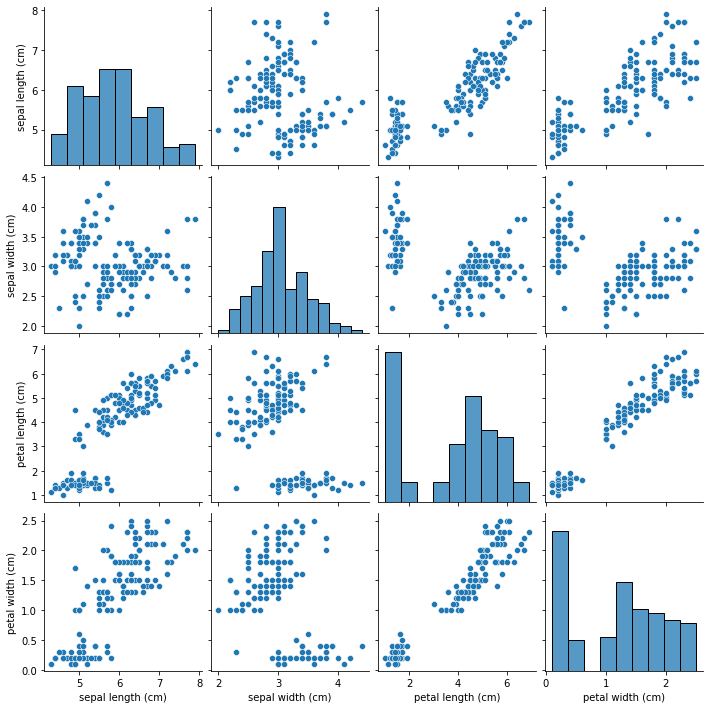

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sns.pairplot(df)
plt.show()

- Sepal length와 Sepal width와의 관계

In [10]:
df['species'] = iris.target
markers = ['^','s','o']     # 세모, 네모, 동그라미

In [12]:
df[df.species == 0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


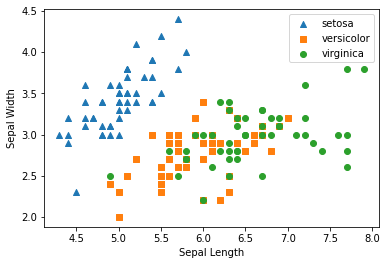

In [14]:
for i, marker in enumerate(markers):
    x_data = df[df.species == i]['sepal length (cm)']
    y_data = df[df.species == i]['sepal width (cm)']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

### PCA 변환 데이터를 시각화

In [15]:
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,PC1,PC2
0,5.1,3.5,1.4,0.2,0,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,-2.389842,0.646835


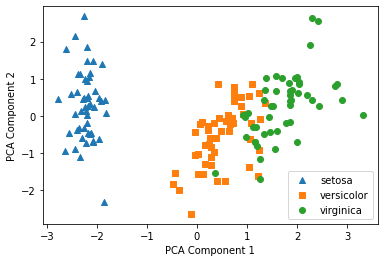

In [16]:
for i, marker in enumerate(markers):
    x_data = df[df.species == i]['PC1']
    y_data = df[df.species == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

### PCA 전후 분류 비교

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

- 원본 데이터를 표준화한 데이터로 분류

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_std, iris.target, stratify=iris.target,
    test_size=0.2, random_state=2021
)

In [19]:
svc = SVC(random_state=2021)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
accuracy_score(y_test, pred)

0.9

- PCA 데이터로 분류

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca, iris.target, stratify=iris.target,
    test_size=0.2, random_state=2021
)

In [21]:
svc = SVC(random_state=2021)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333